In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_parallelise as u_par
import datetime
import salem
from salem import get_demo_file, DataLevels, GoogleVisibleMap, Map
import shapely.geometry as shpg
import glob
import pickle as pkl
import os
import multiprocessing


pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
# to average CP4 data use /GLOBAL/GLOBAL_CP4_create_means.py

In [4]:
out_fut = glob.glob(cnst.network_data+'data/LMCS/MCS_files/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box_v2/*.nc')
out_hist = glob.glob(cnst.network_data+'data/LMCS/MCS_files/CP4_box/CP4_allHours_historical_5000km2_-50_WAf_box_v2/*.nc')

In [5]:
out_fut

['/home/ck/DIR/cornkle/data/LMCS/MCS_files/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box_v2/2004-08-26_17:00:00_64_lonXlat_[14.]_[15.2].nc',
 '/home/ck/DIR/cornkle/data/LMCS/MCS_files/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box_v2/2000-07-03_17:00:00_37_lonXlat_[4.1]_[11.5].nc',
 '/home/ck/DIR/cornkle/data/LMCS/MCS_files/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box_v2/2001-06-18_17:00:00_22_lonXlat_[20.5]_[10.9].nc',
 '/home/ck/DIR/cornkle/data/LMCS/MCS_files/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box_v2/2004-09-02_17:00:00_23_lonXlat_[-4.]_[9.7].nc',
 '/home/ck/DIR/cornkle/data/LMCS/MCS_files/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box_v2/1998-07-14_17:00:00_38_lonXlat_[-3.4]_[13.2].nc',
 '/home/ck/DIR/cornkle/data/LMCS/MCS_files/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box_v2/2000-07-03_17:00:00_38_lonXlat_[-8.3]_[13.].nc',
 '/home/ck/DIR/cornkle/data/LMCS/MCS_files/CP4_box/CP4_allHours_future_5000km2_-50_WAf_box_v2/2006-06-19_17:00:00_59_lonXlat_[-5.9]_[11.3].nc

In [12]:
# da_hist = xr.open_mfdataset(out_hist + '*-08-*.nc', concat_dim="cases", combine="nested", decode_times=False)
# da_fut = xr.open_mfdataset(out_fut + '*-08-*.nc', concat_dim="cases", combine="nested", decode_times=False)

In [11]:
# def loop(files, var):
#     ll = []
#     alls = len(files)
#     cnt=0
#     for ids, ff in enumerate(files):
#         print(ids+1, 'of', alls)
#         ds = xr.open_dataset(ff)
#         ll.append(ds[var])
#         del ds
#     return xr.concat(ll, dim='cases')

In [14]:
def mloop(ff):
    ds = xr.open_dataset(ff)
    return ds

In [17]:
pool = multiprocessing.Pool(processes=5)
ll = pool.map(mloop, out_fut)

pool.close()
fut_ll = xr.concat(ll, dim='cases')

In [20]:
fut_ll

In [19]:
out_fut

In [2]:
da_hist = da_hist.load()
da_fut = da_fut.load()

NameError: name 'da_hist' is not defined

In [ ]:
f = plt.figure(figsize=(15,5), dpi=300)
mname = 'node'
extent = 57 #* 4.4

for ix, var in enumerate(['sh', 'shear', 't2', 'q2', 'v_srfc']):
    
    ax = f.add_subplot(2,5,ix+1)

    ano = da_hist[var].mean('cases')

    thresh = np.max(np.abs(np.percentile(ano, [5, 95])))

    plt.contourf(ano, cmap='RdBu', levels=np.linspace(thresh * -1, thresh, 10),
                     extend='both')
    
    plt.plot(extent, extent, 'bo')
    #ax.set_xticks((np.linspace(0, 2 * extent, 9)))
    #ax.set_xticklabels(((np.linspace(0, (2 * extent), 9) - extent)*0.25).round(1).astype(float))
    #ax.set_yticks((np.linspace(0, 2 * extent, 9)))
    #ax.set_yticklabels(((np.linspace(0, (2 * extent), 9) - extent)*0.25).round(1).astype(float))
    ax.set_xlabel('km')
    ax.set_ylabel('km')
    #ax.axvline(extent, linestyle='dashed', color='k')
    #ax.axhline(extent, linestyle='dashed', color='k')

#     rect = patches.Rectangle((5.5, 5.5), 11, 11, linewidth=0.5, edgecolor='k', facecolor='none')
#     ax.add_patch(rect)

    plt.colorbar(label='count')
    #plt.title(regs+' day 0 initiations',  fontsize=10)
    
    
    ax = f.add_subplot(2,5,ix+1+5)

    ano = da_fut[var].mean('cases')-da_hist[var].mean('cases')

    #thresh = np.max(np.abs(np.percentile(ano, [5,95])))

    plt.contourf(ano, cmap='RdBu', levels=np.linspace(thresh * -1, thresh, 10),
                     extend='both')
    plt.plot(extent, extent, 'bo')
    #ax.set_xticks((np.linspace(0, 2 * extent, 9)))
    #ax.set_xticklabels(((np.linspace(0, (2 * extent), 9) - extent)*0.25).round(1).astype(float))
    #ax.set_yticks((np.linspace(0, 2 * extent, 9)))
    #ax.set_yticklabels(((np.linspace(0, (2 * extent), 9) - extent)*0.25).round(1).astype(float))
    ax.set_xlabel('km')
    ax.set_ylabel('km')
    #ax.axvline(extent, linestyle='dashed', color='k')
    #ax.axhline(extent, linestyle='dashed', color='k')

#     rect = patches.Rectangle((5.5, 5.5), 11, 11, linewidth=0.5, edgecolor='k', facecolor='none')
#     ax.add_patch(rect)

    plt.colorbar(label='count')
    plt.title(var,  fontsize=10)
    
plt.tight_layout()
#f.savefig(cnst.network_data + 'figs/LSTA/corrected_LSTA/new/wavelet_coefficients/2hOverlap/maps.png')

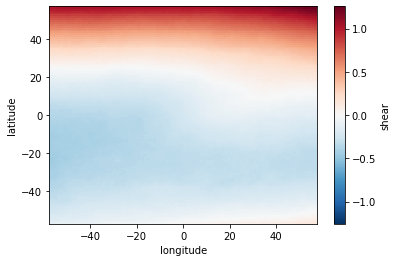

In [20]:
da_fut['shear'].mean('cases').plot.pcolormesh()

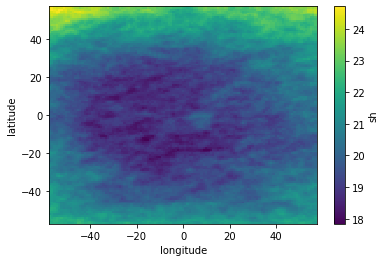

In [15]:
da_hist_std['sh'].mean('cases').plot.pcolormesh()

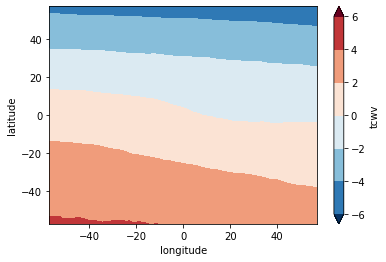

In [69]:
((da_hist['tcwv'])).plot.contourf(cmap='RdBu_r', extend='both')

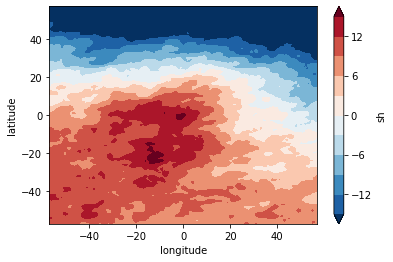

In [71]:
fmean = (da_fut['sh']-da_hist['sh']).mean()
((da_fut['sh']-da_hist['sh'])-fmean.values).plot.contourf(levels=np.arange(-15,16,3), cmap='RdBu_r', extend='both')

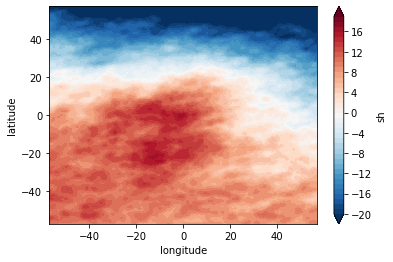

In [72]:
((da_fut['sh']-da_hist['sh'])).plot.contourf(levels=np.arange(-20,20,1), cmap='RdBu_r', extend='both')

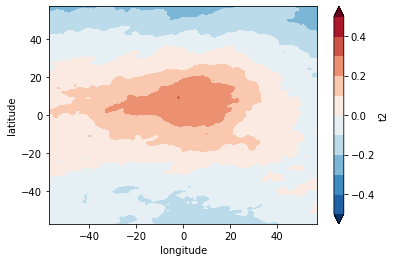

In [73]:
fmean = (da_fut['t2']-da_hist['t2']).mean()
((da_fut['t2']-da_hist['t2'])-fmean).plot.contourf(levels=np.arange(-0.5,0.6,0.1), cmap='RdBu_r', extend='both')

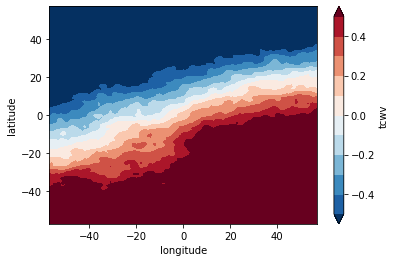

In [77]:
fmean = (da_fut['tcwv']-da_hist['tcwv']).mean()
(((da_fut['tcwv']-da_hist['tcwv'])-fmean)).plot.contourf(levels=np.arange(-0.5,0.6,0.1), cmap='RdBu_r', extend='both')

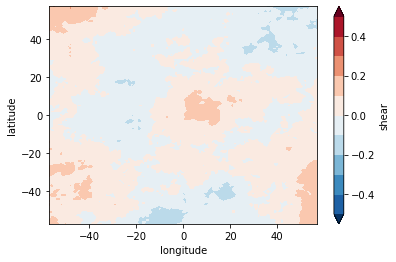

In [41]:
fmean = (da_fut['shear']-da_hist['shear']).mean()
((da_fut['shear']-da_hist['shear'])-fmean).plot.contourf(levels=np.arange(-0.5,0.6,0.1), cmap='RdBu_r', extend='both')

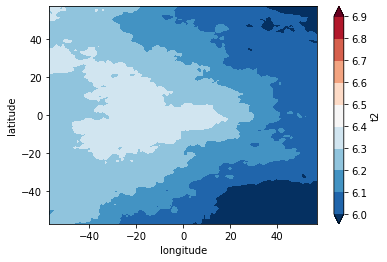

In [34]:
(da_fut['t2']-da_hist['t2']).plot.contourf(levels=np.arange(6,7,0.1), cmap='RdBu_r', extend='both')

In [13]:
out = cnst.lmcs_drive+'CP_models/MCS_files/MODELS/CP4_box/mean_loop/'
for m in range(6,7):
    ds_files = glob.glob(cnst.lmcs_drive + 'CP_models/MCS_files/MODELS/CP4_box/CP4_allHours_historical_5000km2_-50_WAf_box/*-'+str(m).zfill(2)+'-*.nc')[0:300]
    print(len(ds_files))
    ds_dummy = xr.open_dataset(ds_files[0])*0
    ds_dummy = ds_dummy.where(np.isfinite(ds_dummy), other=0)
    ds_valid = xr.open_dataset(ds_files[0])*0
    ds_valid = ds_valid.where(np.isfinite(ds_valid), other=0)
    
    idx = 0
    for ff in ds_files:
        idx +=1
        print('Doing', idx)
        ds = xr.open_dataset(ff)
        for dv in ds.data_vars:
            if dv not in ['lwout_noon', 'lsRain_noon', 'lw_out_PBLtop', 'lsRain']:
                ds_dummy[dv].values = ds_dummy[dv].where(np.isfinite(ds_dummy[dv]), other=0) + (ds[dv].where(np.isfinite(ds[dv]), other=0).values - np.nanmean(ds[dv].values))
            else:
                ds_dummy[dv].values = ds_dummy[dv].where(np.isfinite(ds_dummy[dv]), other=0) + (ds[dv].where(np.isfinite(ds[dv]), other=0)).values
            ds_valid[dv].values = ds_valid[dv].values + np.isfinite(ds_dummy[dv]).astype(int)
            #ipdb.set_trace()
            
    mean = ds_dummy /  ds_valid #
            
    mean.to_netcdf(out+'CP4hist_anom_mean_pure_'+str(m)+'.nc')

In [13]:
def file_loop(chunk_in):
    
    ds_dummy = xr.open_dataset(chunk_in[0])*0
    ds_dummy = ds_dummy.where(np.isfinite(ds_dummy), other=0)
    ds_valid = xr.open_dataset(chunk_in[0])*0
    ds_valid = ds_valid.where(np.isfinite(ds_valid), other=0)
   
    for ff in chunk_in:
        print('Doing', ff)
        ds = xr.open_dataset(ff)
        for dv in ds.data_vars:
            if dv not in ['lwout_noon', 'lsRain_noon', 'lw_out_PBLtop', 'lsRain']:
                ds_dummy[dv].values = ds_dummy[dv].where(np.isfinite(ds_dummy[dv]), other=0) + (ds[dv].where(np.isfinite(ds[dv]), other=0).values - np.nanmean(ds[dv].values))
            else:
                ds_dummy[dv].values = ds_dummy[dv].where(np.isfinite(ds_dummy[dv]), other=0) + (ds[dv].where(np.isfinite(ds[dv]), other=0)).values
            ds_valid[dv].values = ds_valid[dv].values + np.isfinite(ds_dummy[dv]).astype(int)
            #ipdb.set_trace()

    mean = ds_dummy 
    valid = ds_valid

    return mean, valid

In [14]:
out = cnst.lmcs_drive+'CP_models/MCS_files/MODELS/CP4_box/mean_loop/'
for m in range(6,7):
    ds_files = glob.glob(cnst.lmcs_drive + 'CP_models/MCS_files/MODELS/CP4_box/CP4_allHours_historical_5000km2_-50_WAf_box/*-'+str(m).zfill(2)+'-*.nc')[0:300]
    print(len(ds_files))

    
    chunks = [ds_files[i:i+10] for i in range(0,len(ds_files), 10)]
    
    idx = 0
    
    dic = u_par.run_mixed(4, file_loop, chunks, ['mean', 'valid'])

    outdic = {}
    for k in dic.keys():
       outdic[k] = xr.concat(dic[k], dim='chunks')
    
    mean = outdic['valid'].sum('chunks') #  outdic['mean'].sum('chunks') /
    mean.to_netcdf(out+'CP4hist_anom_mean_multiproc_'+str(m)+'.nc')

ipdb> c
